# Exploratory Data Analysis (EDA)

**Objective**: Understand the dataset structure and characteristics.
This EDA focuses on:
- Inspecting data structure and types
- Checking for imbalance and missing values
- Understanding distributions and cardinality
- Building a foundation for preprocessing design


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/bank_data.csv')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (41188, 21)


,age,occupation,marital_status,education,has_credit,housing_loan,personal_loan,contact_mode,month,week_day,last_contact_duration,contacts_per_campaign,N_last_days,nb_previous_contact,previous_outcome,emp_var_rate,cons_price_index,cons_conf_index,euri_3_month,nb_employees,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Structure and Summary Stats
Check data types and spot potential issues.

In [3]:
# Basic info and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    41188 non-null  int64  
 1   occupation             41188 non-null  object 
 2   marital_status         41188 non-null  object 
 3   education              41188 non-null  object 
 4   has_credit             41188 non-null  object 
 5   housing_loan           41188 non-null  object 
 6   personal_loan          41188 non-null  object 
 7   contact_mode           41188 non-null  object 
 8   month                  41188 non-null  object 
 9   week_day               41188 non-null  object 
 10  last_contact_duration  41188 non-null  int64  
 11  contacts_per_campaign  41188 non-null  int64  
 12  N_last_days            41188 non-null  int64  
 13  nb_previous_contact    41188 non-null  int64  
 14  previous_outcome       41188 non-null  object 
 15  em

In [4]:
# Summary statistics for numeric columns
df.describe()

,age,last_contact_duration,contacts_per_campaign,N_last_days,nb_previous_contact,emp_var_rate,cons_price_index,cons_conf_index,euri_3_month,nb_employees
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Summary statistics for object type columns
df.describe(include='object')

,occupation,marital_status,education,has_credit,housing_loan,personal_loan,contact_mode,month,week_day,previous_outcome,target
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


##  Missing Values
Check for any missing values in the dataset.


In [6]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

## Target Variable Balance
Check the dataset to see if the target variable is imbalanced, as it is crucial in model choice and evaluation.


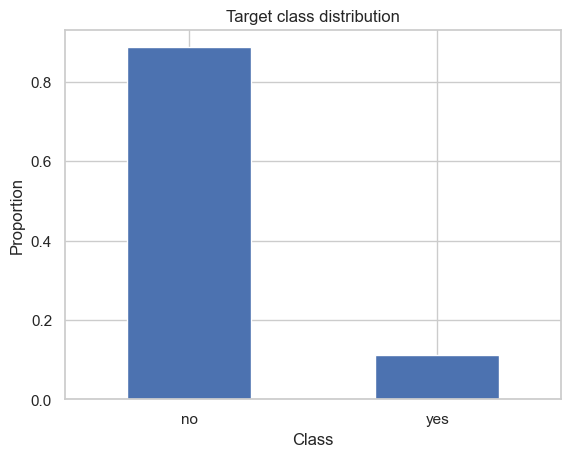

In [7]:
# Check target variable distribution
target_col = 'target'
df[target_col].value_counts(normalize=True).plot(kind='bar', title='Target class distribution')
plt.ylabel('Proportion')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.show()

**Observation:**  
The target variable is highly imbalanced, with the majority of customers labeled as "no" (did not subscribe). This suggests that accuracy alone would be a misleading performance metric, and it should be ensured that the model can effectively identify the minority "yes" class. This can be done by proper choice of evaluation metric and not only accuracy, and choosing a model that is able to hanlde imbalance data well.

## Unique Values and Categorical feature Inspection

Check how many unique values each categorical column has, and inspect the actual values and their count.
This helps design the right preprocessing strategy.

In [8]:
# List of object-type columns (likely categorical)
cat_cols = df.select_dtypes(include='object').columns.tolist()

print("Unique values per categorical column:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Unique values per categorical column:
occupation: 12 unique values
marital_status: 4 unique values
education: 8 unique values
has_credit: 3 unique values
housing_loan: 3 unique values
personal_loan: 3 unique values
contact_mode: 2 unique values
month: 10 unique values
week_day: 5 unique values
previous_outcome: 3 unique values
target: 2 unique values


In [9]:
# Display actual unique values to check for typos or format issues
for col in cat_cols:
    print(f"\n{col} unique values:")
    print(df[col].unique())


occupation unique values:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital_status unique values:
['married' 'single' 'divorced' 'unknown']

education unique values:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

has_credit unique values:
['no' 'unknown' 'yes']

housing_loan unique values:
['no' 'yes' 'unknown']

personal_loan unique values:
['no' 'yes' 'unknown']

contact_mode unique values:
['telephone' 'cellular']

month unique values:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

week_day unique values:
['mon' 'tue' 'wed' 'thu' 'fri']

previous_outcome unique values:
['nonexistent' 'failure' 'success']

target unique values:
['no' 'yes']


In [10]:
# Count of each unique value in each category
for col in cat_cols:
    print(f"\n----- {col} -----")
    print(df[col].value_counts(dropna=False))


----- occupation -----
occupation
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

----- marital_status -----
marital_status
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

----- education -----
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

----- has_credit -----
has_credit
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

----- housing_loan -----
housing_loan
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

--

In [11]:
# Total number of rows
total_rows = len(df)

# Features to check
features_to_check = ['has_credit', 'education', 'housing_loan', 'personal_loan', 'occupation', 'marital_status']

# Calculate and print percentage of 'unknown' values in each column
unknown_percentages = (
    df[features_to_check].apply(lambda col: (col == 'unknown').sum()) / total_rows * 100
).sort_values(ascending=False).round(2)

print(unknown_percentages)

has_credit        20.87
education          4.20
housing_loan       2.40
personal_loan      2.40
occupation         0.80
marital_status     0.19
dtype: float64


Dropping rows with 'unknown' would reduce your dataset size(up to 20% in some features) risking loss of statistical power and potential bias, especially since 'unknown' may carry predictive meaning (e.g., non-disclosure patterns), most of the models can learn from when treated as a separate category.

**Observations:**
- `occupation`: 12 categories, looks usable; "unknown" is rare (engineer the feature to 'is_credit_unknown').
- `marital_status`: 4 values; "unknown" is rare.
- `education`: 8 values; possibly ordinal, "illiterate" and "unknown" are rare.
- `has_credit`: Only 3 "yes" values, likely unusable (maybe drop or engineer).
- `housing_loan`, `personal_loan`: Balanced enough, but contain "unknown".
- `contact_mode`: Binary; clean and safe for one-hot or binary encoding.
- `month`: 10 values; could be encoded categorically depending on model choice.
- `week_day`: 5 clean values; safe for one-hot encoding.
- `previous_outcome`: Skewed but meaningful (success/failure/nonexistent)
- `target`: Imbalanced (~10% "yes"); requires careful metric selection as mentioned beofre.


## Numeric Feature Distributions
Understand skew, outliers, and scale differences in the numerical features.

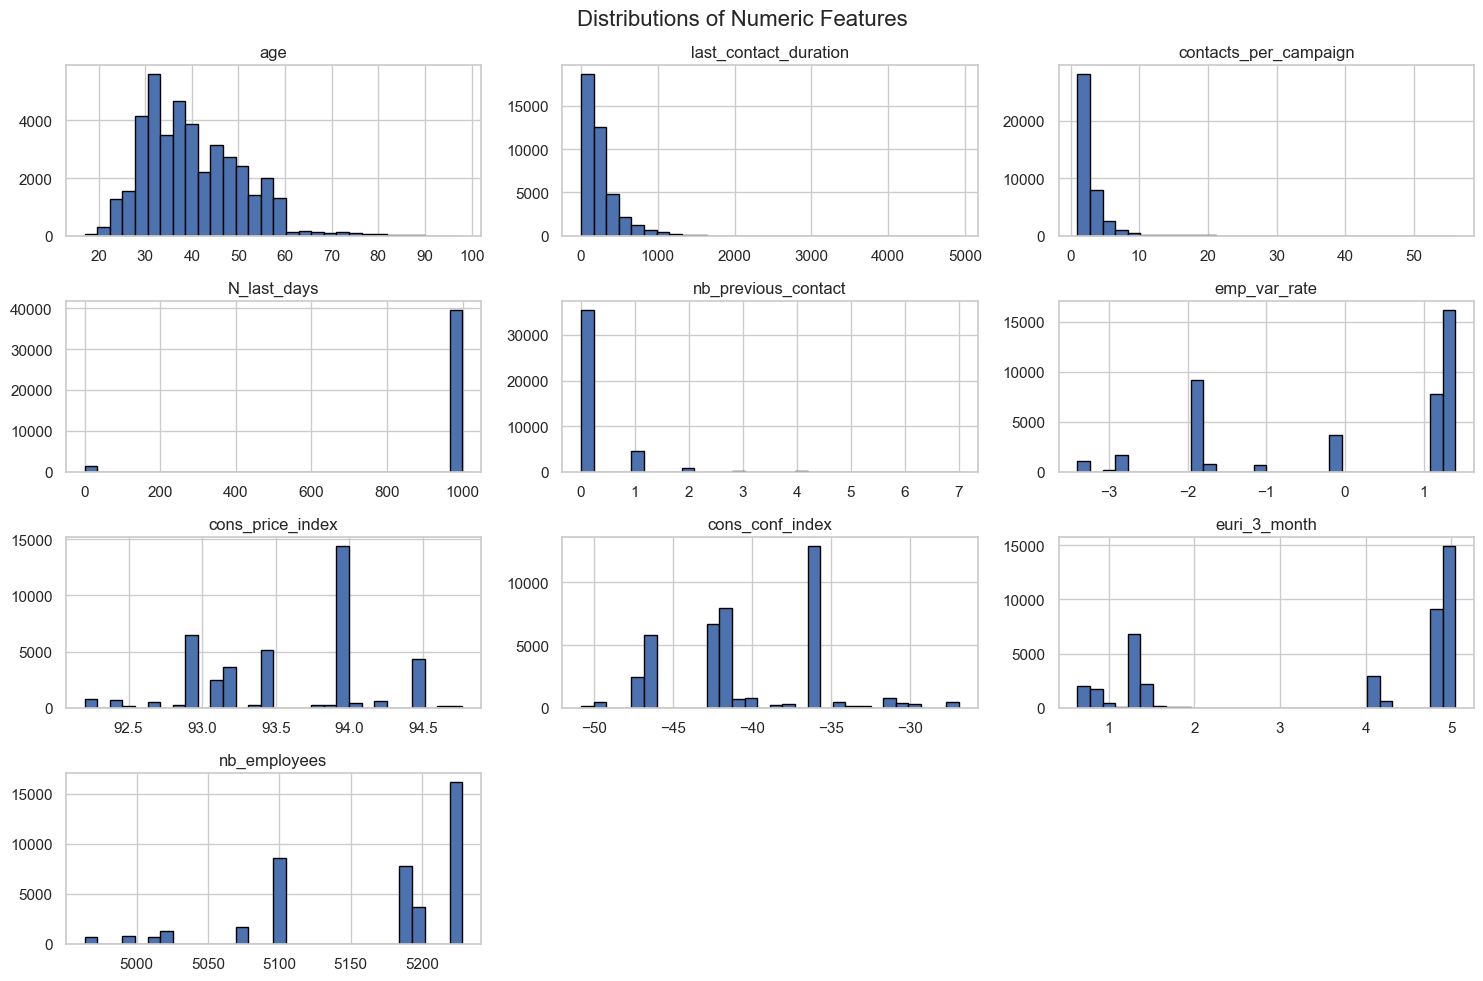

In [12]:
# Plotting the distribution of each numerical feature
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor="black")
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

**Observations :**
- `age`: Slight right skew; values mostly between 20–60
- `last_contact_duration`: Leaking feature, will be dropped.
- `N_last_days`: Bimodal; either recently contacted or very long gap (~999), may need special handling
- `nb_previous_contact`: Most values are 0–1, few go higher — mostly first time contacted.
- `emp_var_rate`, `cons_price_index`, `cons_conf_index`, `euri_3_month`, `nb_employees`: Discrete/few values repeated — can be scaled normally


## Correlation Heatmap
Check for multicollinearity or strongly correlated features.

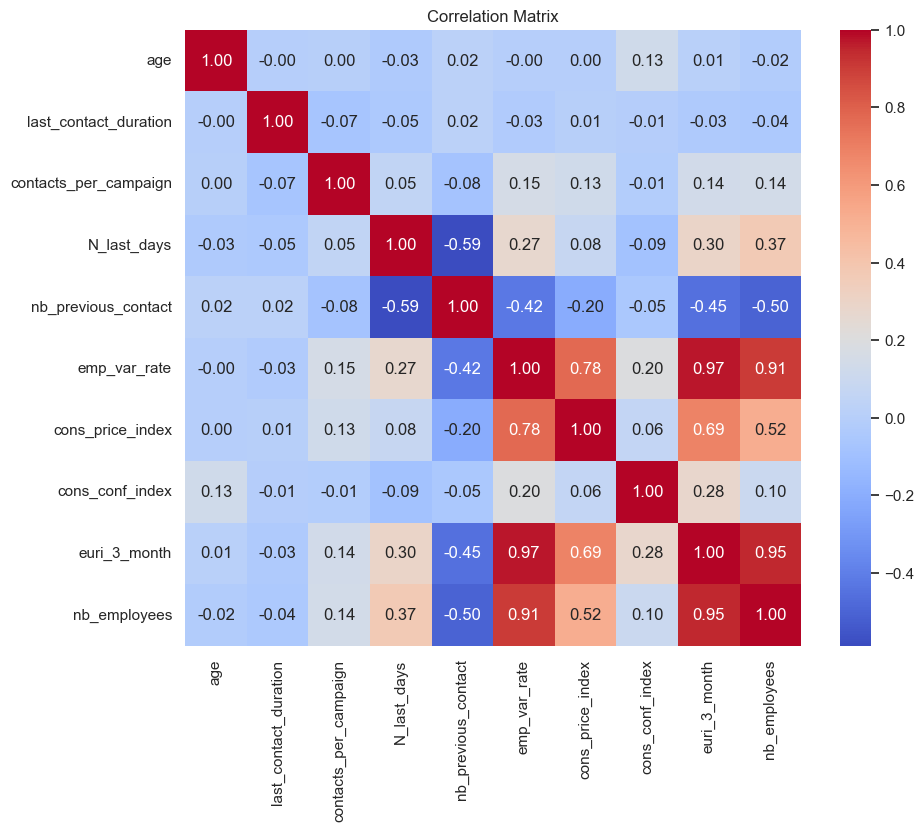

In [13]:
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

**Observations**

- **Macroeconomic features** (`emp_var_rate`, `euri_3_month`, `nb_employees`) are highly correlated, capture similar trends.
- **Behavioral features** (`last_contact_duration`, `contacts_per_campaign`) are mostly independent, each adds value.
- **Negative link** between `N_last_days` and `nb_previous_contact` shows clear timing effect.
- **Low multicollinearity overall** supports stable and interpretable modeling.


# Some Plots..

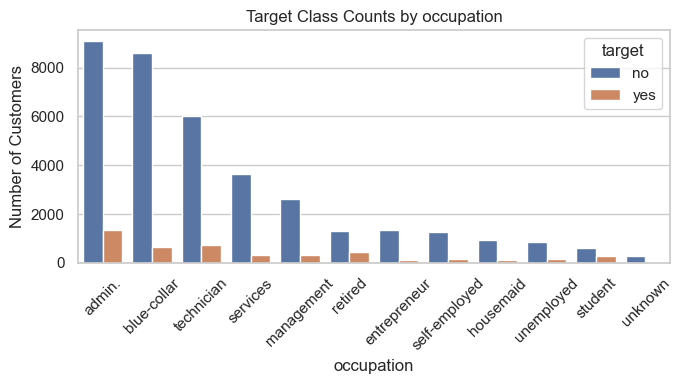

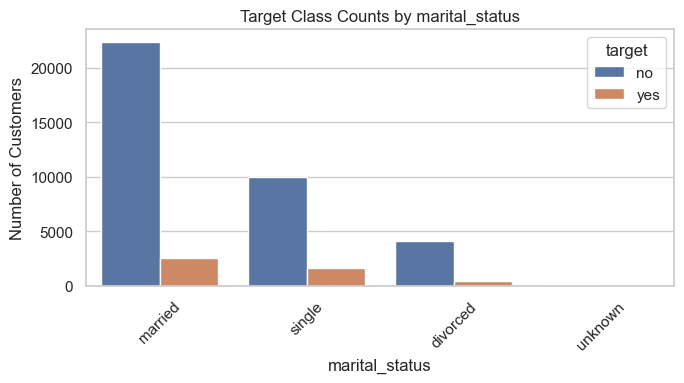

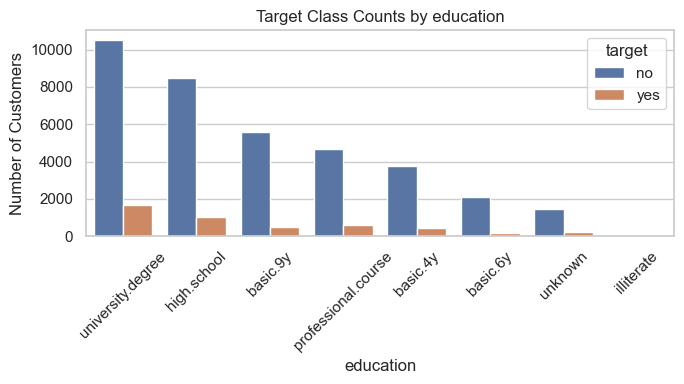

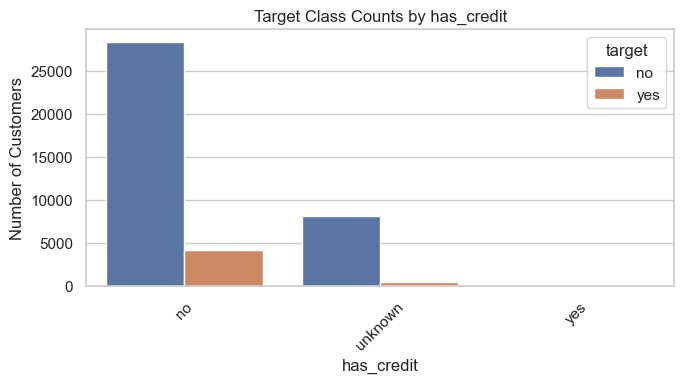

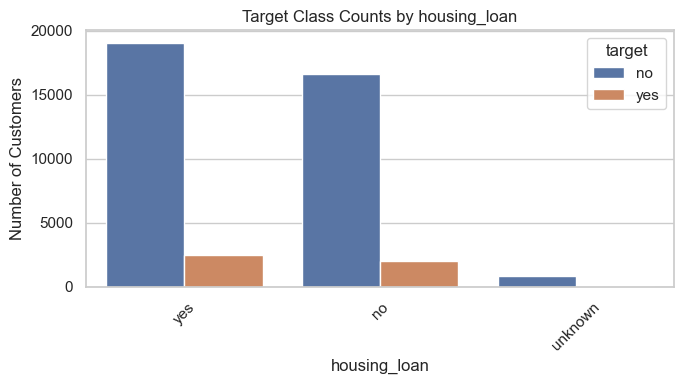

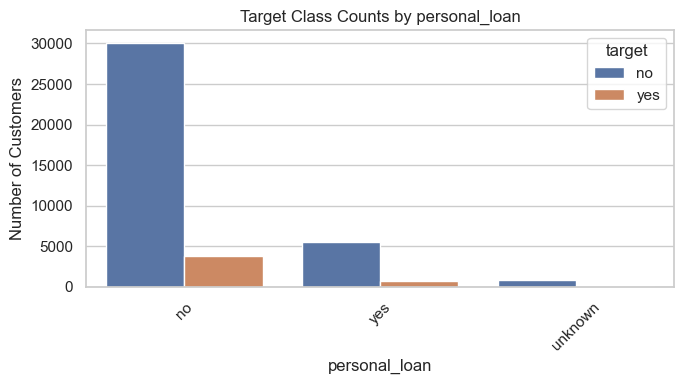

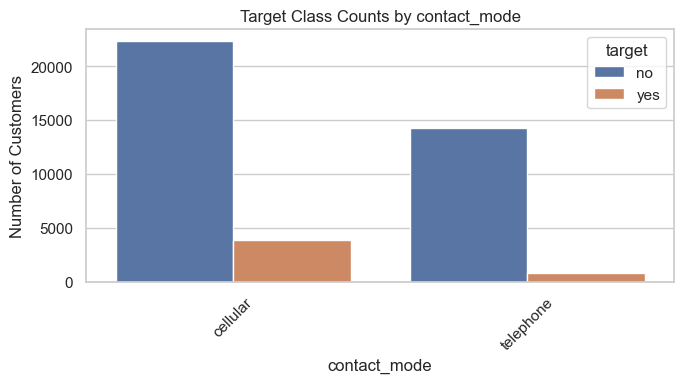

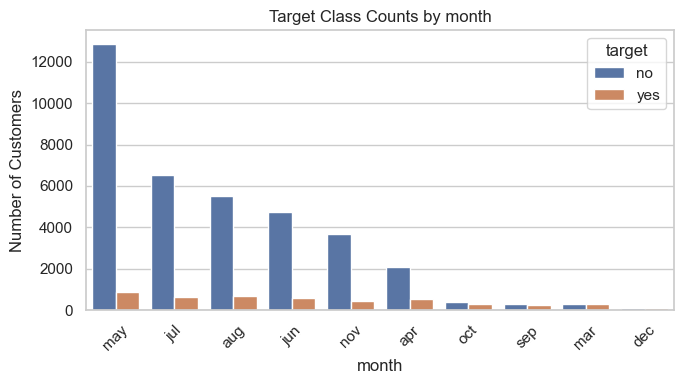

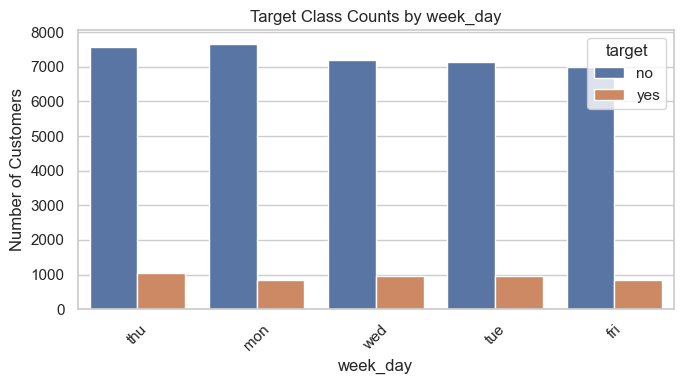

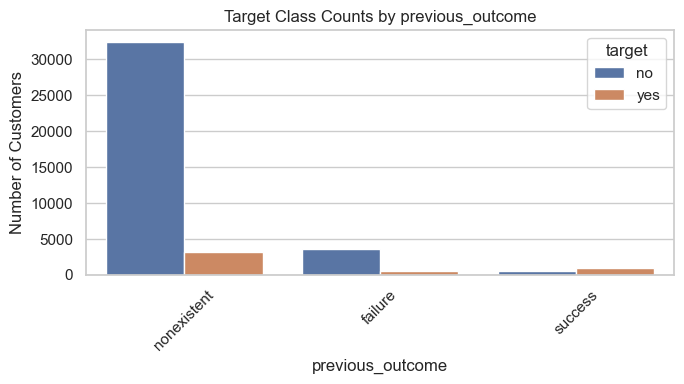

In [14]:
for col in cat_cols:
    if col == "target":
        continue
    plt.figure(figsize=(7, 4))
    
    # Get sorted categories by total count (not just one class)
    sorted_order = df[col].value_counts().index
    
    sns.countplot(data=df, x=col, hue='target', order=sorted_order)
    plt.title(f"Target Class Counts by {col}")
    plt.ylabel("Number of Customers")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


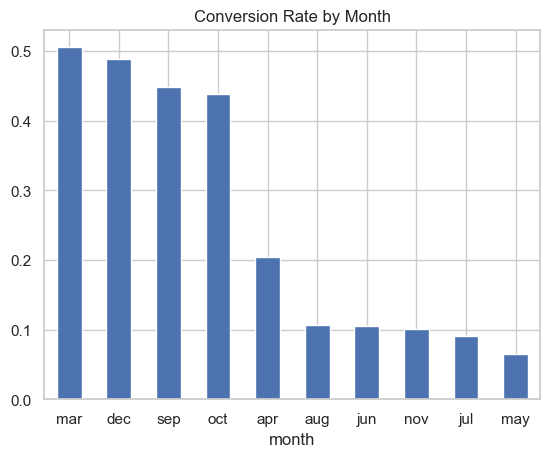

In [15]:
conversion_rate = (
    df.groupby('month')['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes']
    .sort_values(ascending=False)
)

conversion_rate.plot(kind='bar', title='Conversion Rate by Month', rot=0)
plt.show()

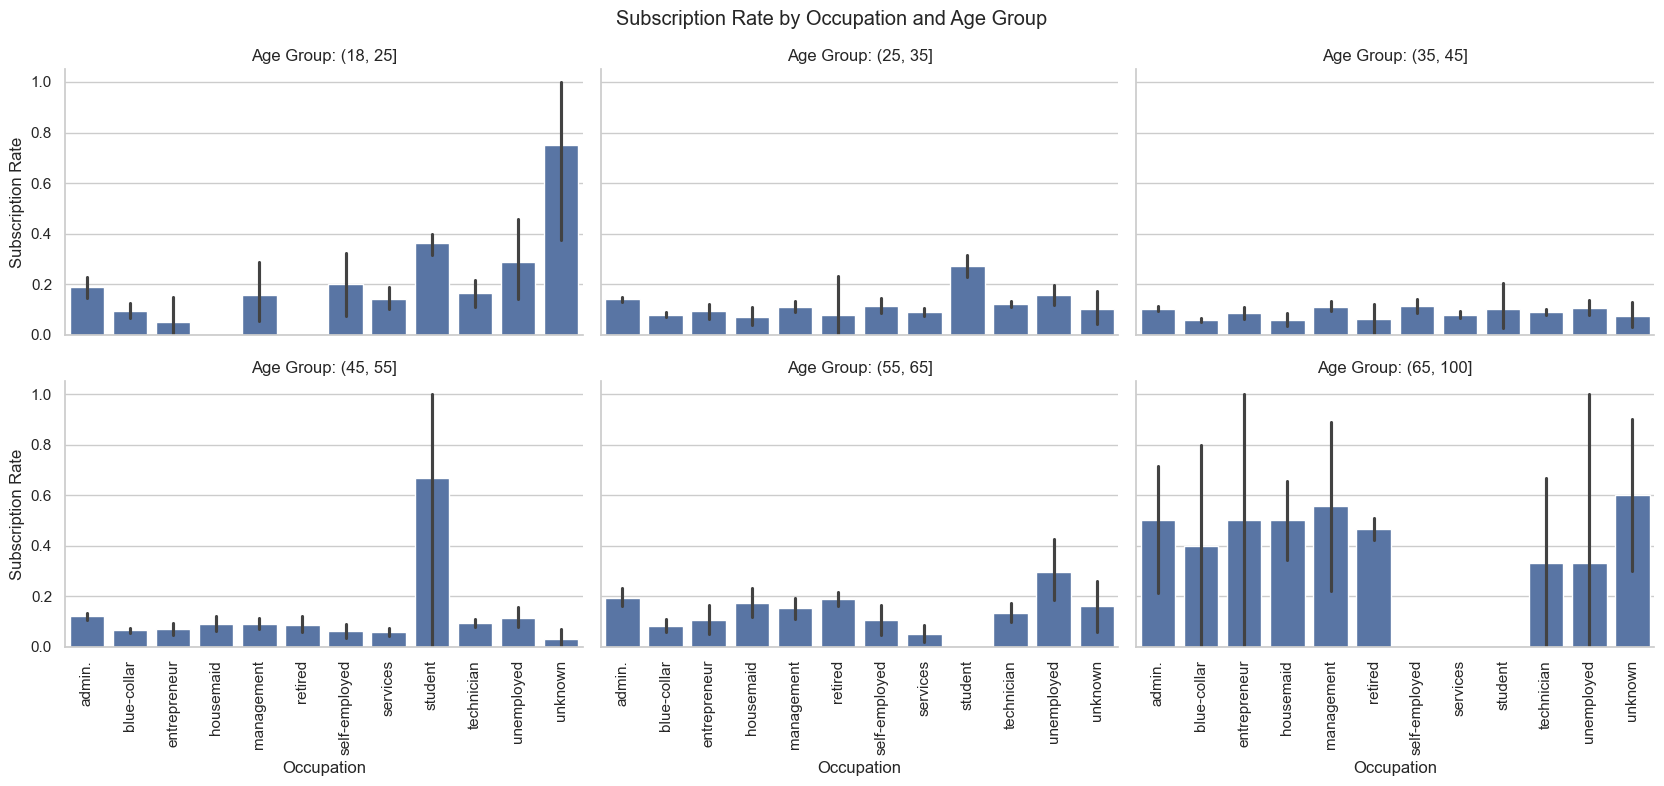

In [16]:
# Age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 100])
df['target_bin'] = df['target'].map({'no': 0, 'yes': 1})


g = sns.catplot(
    data=df,
    x="occupation",
    y="target_bin",
    col="age_group",
    kind="bar",
    col_wrap=3,
    height=4,
    aspect=1.4,
    order=sorted(df['occupation'].unique())
)

g.set_titles("Age Group: {col_name}")
g.set_axis_labels("Occupation", "Subscription Rate")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(top=0.9)
plt.suptitle("Subscription Rate by Occupation and Age Group")
plt.tight_layout()
plt.show()


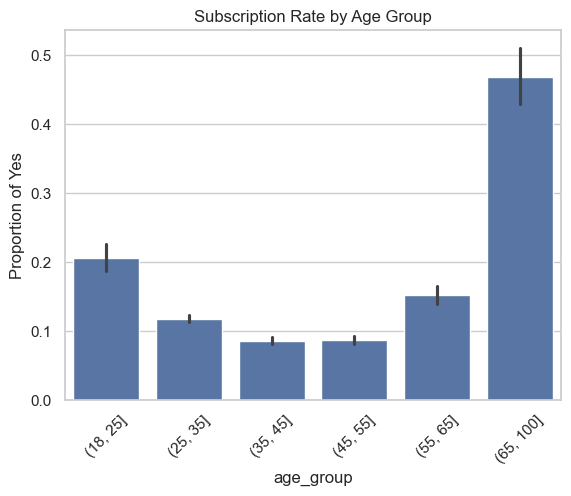

In [17]:
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 100])
sns.barplot(data=df, x='age_group', y=df['target'].map({'no': 0, 'yes': 1}))
plt.title("Subscription Rate by Age Group")
plt.ylabel("Proportion of Yes")
plt.xticks(rotation=45)
plt.show()

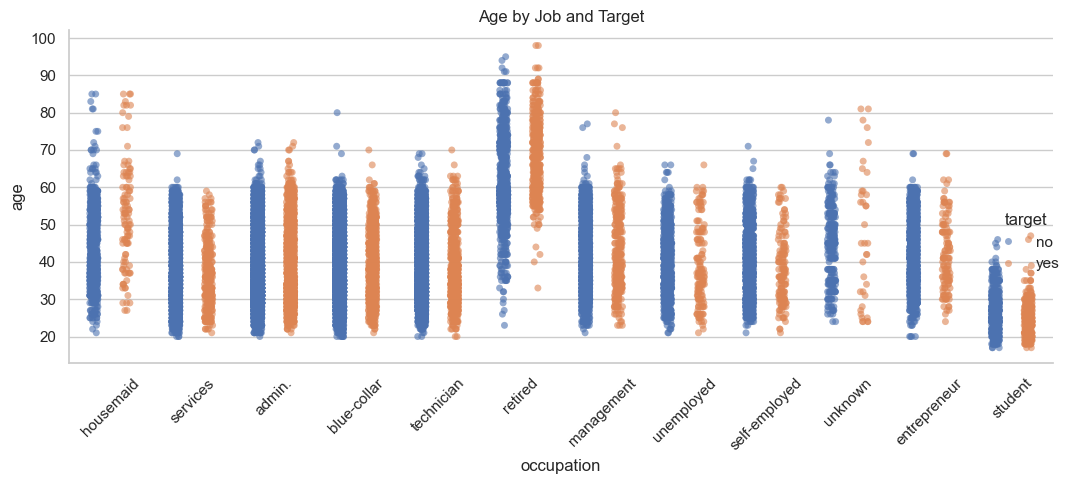

In [18]:
sns.catplot(
    data=df,
    x="occupation",     
    y="age",
    hue="target",          
    kind="strip",
    jitter=True,
    dodge=True,
    height=5,
    aspect=2,       
    alpha=0.6
)

plt.xticks(rotation=45)
plt.title("Age by Job and Target")
plt.tight_layout()
plt.show()

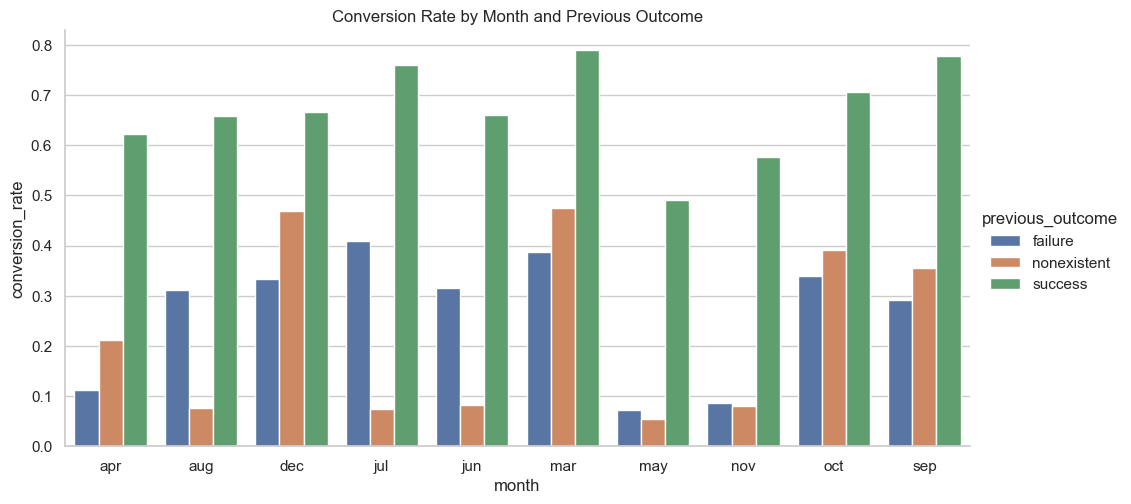

In [19]:
conversion = (
    df.groupby(['month', 'previous_outcome'])['target']
    .value_counts(normalize=True)
    .unstack()['yes']
    .reset_index()
    .rename(columns={'yes': 'conversion_rate'})
)

sns.catplot(
    data=conversion,
    kind='bar',
    x='month',
    y='conversion_rate',
    hue='previous_outcome',
    height=5,
    aspect=2
).set(title='Conversion Rate by Month and Previous Outcome')
plt.show()

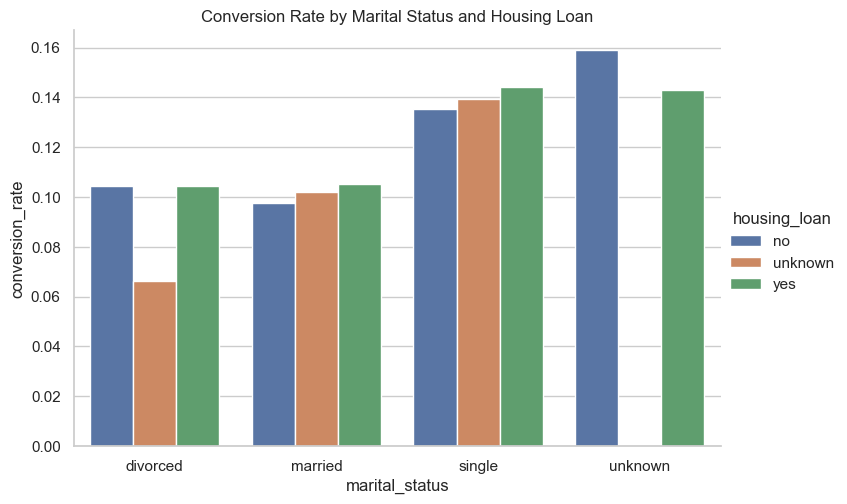

In [20]:
conversion = (
    df.groupby(['marital_status', 'housing_loan'])['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes']
    .reset_index()
    .rename(columns={'yes': 'conversion_rate'})
)

sns.catplot(
    data=conversion,
    kind='bar',
    x='marital_status',
    y='conversion_rate',
    hue='housing_loan',
    height=5,
    aspect=1.5
).set(title='Conversion Rate by Marital Status and Housing Loan')
plt.show()

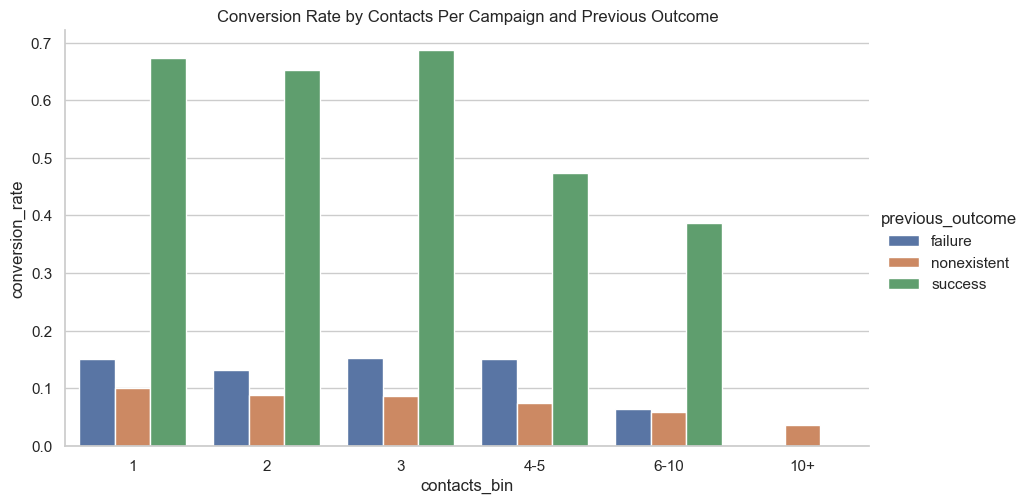

In [21]:
df['contacts_bin'] = pd.cut(df['contacts_per_campaign'], bins=[0,1,2,3,5,10,20], labels=['1','2','3','4-5','6-10','10+'])

conversion = (
    df.groupby(['contacts_bin', 'previous_outcome'])['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes']
    .reset_index()
    .rename(columns={'yes': 'conversion_rate'})
)

sns.catplot(
    data=conversion,
    kind='bar',
    x='contacts_bin',
    y='conversion_rate',
    hue='previous_outcome',
    height=5,
    aspect=1.8
).set(title='Conversion Rate by Contacts Per Campaign and Previous Outcome')
plt.show()

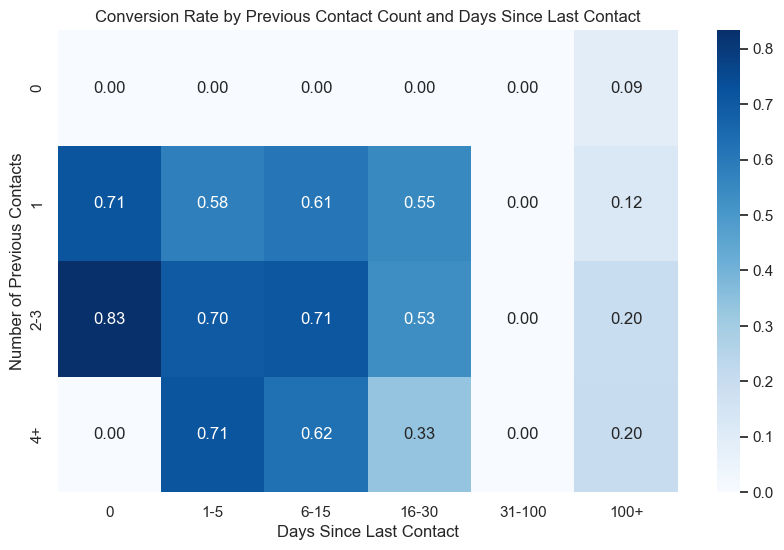

In [22]:
df['prev_contact_bin'] = pd.cut(df['nb_previous_contact'], bins=[-1,0,1,3,10], labels=['0','1','2-3','4+'])
df['last_days_bin'] = pd.cut(df['N_last_days'], bins=[-1,0,5,15,30,100,999], labels=['0','1-5','6-15','16-30','31-100','100+'])

pivot = (
    df.groupby(['prev_contact_bin', 'last_days_bin'])['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes']
    .unstack()
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='Blues', fmt=".2f")
plt.title('Conversion Rate by Previous Contact Count and Days Since Last Contact')
plt.xlabel('Days Since Last Contact')
plt.ylabel('Number of Previous Contacts')
plt.show()

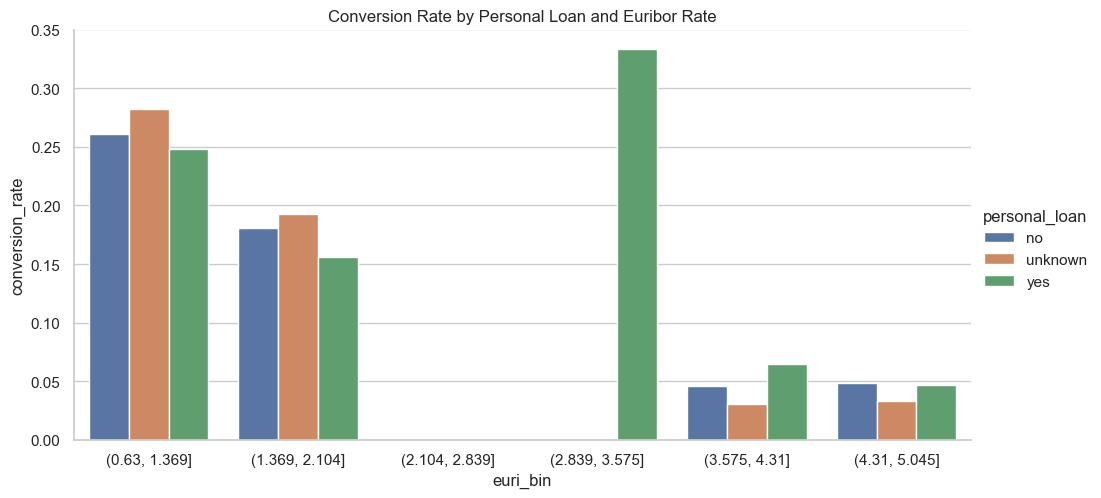

In [23]:
df['euri_bin'] = pd.cut(df['euri_3_month'], bins=6)

conversion = (
    df.groupby(['euri_bin', 'personal_loan'])['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes']
    .reset_index()
    .rename(columns={'yes': 'conversion_rate'})
)

sns.catplot(
    data=conversion,
    kind='bar',
    x='euri_bin',
    y='conversion_rate',
    hue='personal_loan',
    height=5,
    aspect=2
).set(title='Conversion Rate by Personal Loan and Euribor Rate')
plt.show()

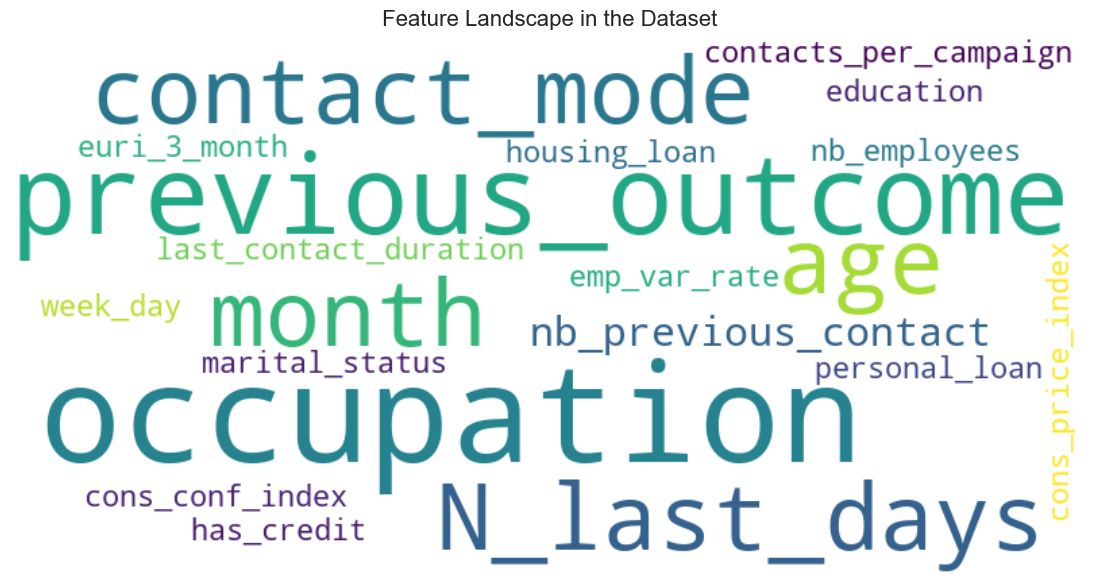

In [24]:
from wordcloud import WordCloud


features = [
    'age', 'occupation', 'marital_status', 'education', 'has_credit',
    'housing_loan', 'personal_loan', 'contact_mode', 'month', 'week_day',
    'last_contact_duration', 'contacts_per_campaign', 'N_last_days',
    'nb_previous_contact', 'previous_outcome', 'emp_var_rate',
    'cons_price_index', 'cons_conf_index', 'euri_3_month', 'nb_employees'
]


weights = {
    'occupation': 3,
    'previous_outcome': 3,
    'contact_mode': 2,
    'age': 2,
    'month': 2,
    'has_credit': 1,
    'housing_loan': 1,
    'N_last_days': 2,
    'nb_previous_contact': 2
}

# Prepare word frequencies
word_freq = {f: weights.get(f, 1) for f in features}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Feature Landscape in the Dataset", fontsize=16)
plt.tight_layout()
plt.show()

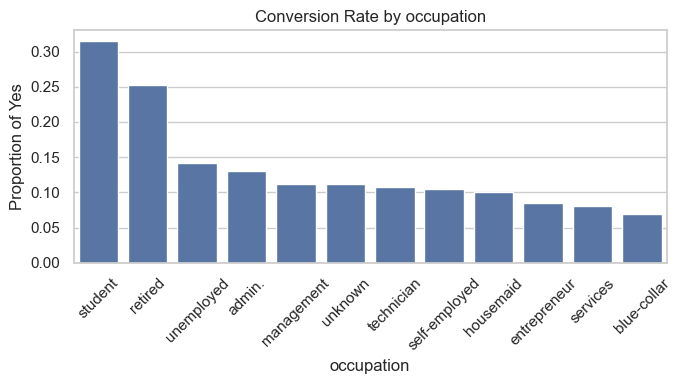

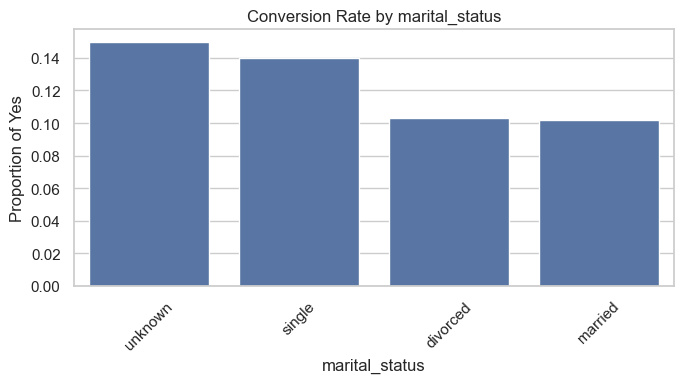

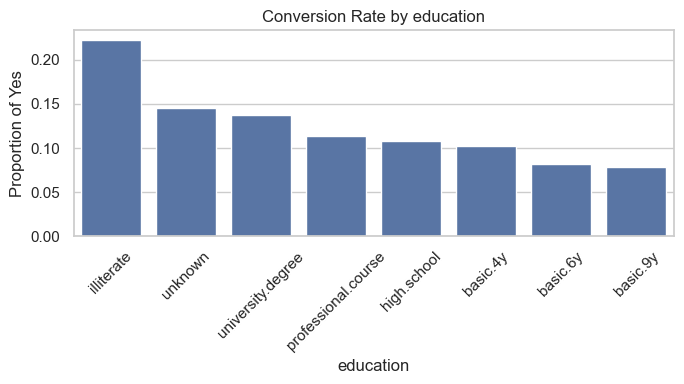

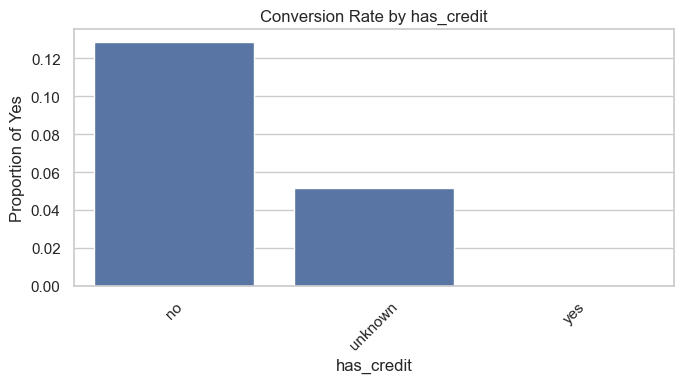

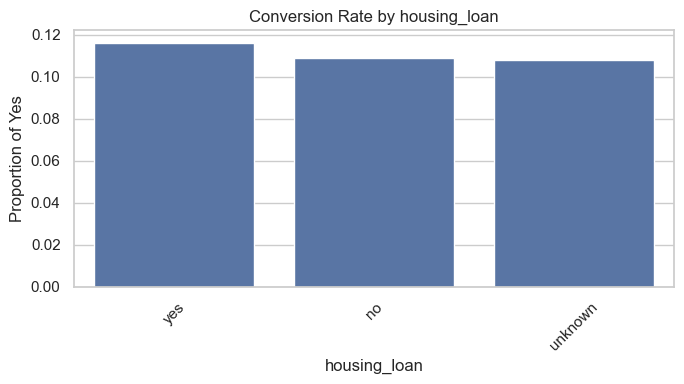

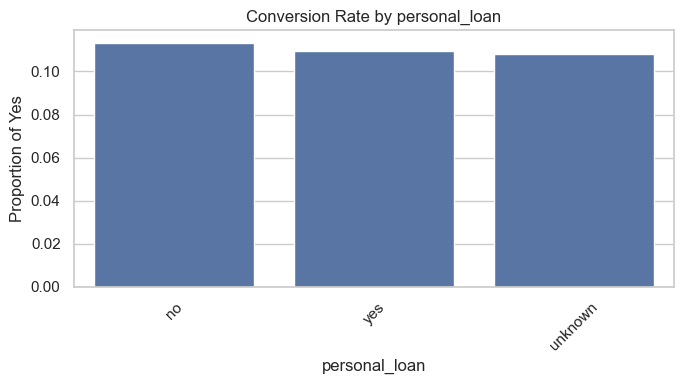

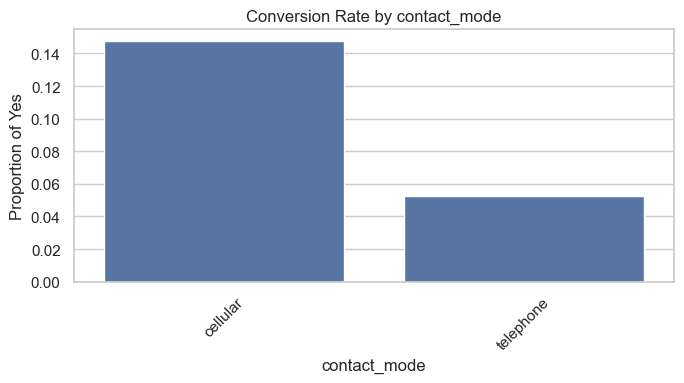

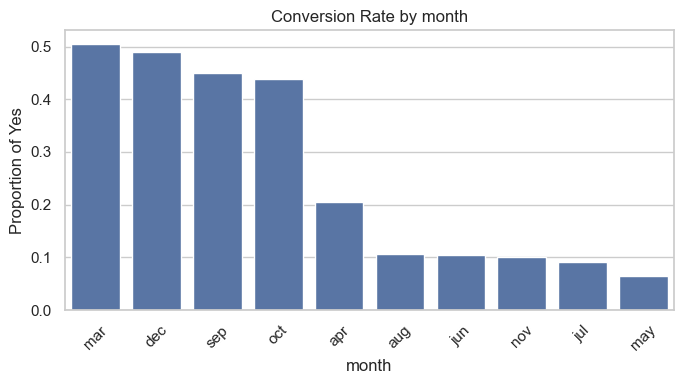

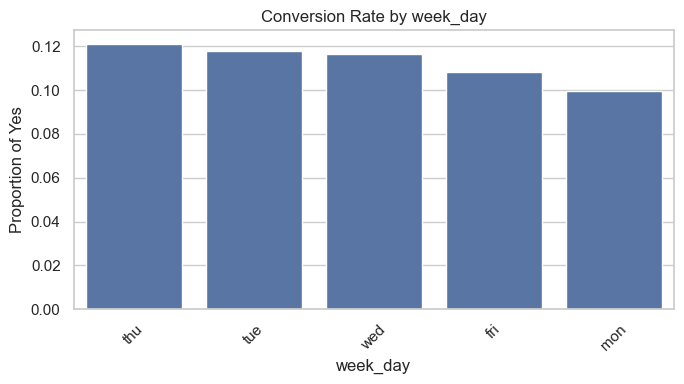

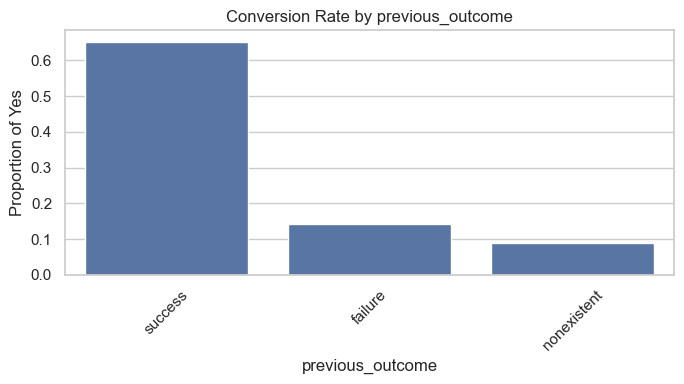

In [25]:
for col in cat_cols:
    if col == "target":
        continue
    plt.figure(figsize=(7, 4))
    
    # Compute conversion rate (i.e., proportion of "yes") for each category
    conversion = (
        df.groupby(col)['target']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)['yes']
        .sort_values(ascending=False)
    )

    sns.barplot(x=conversion.index, y=conversion.values)
    plt.title(f"Conversion Rate by {col}")
    plt.ylabel("Proportion of Yes")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

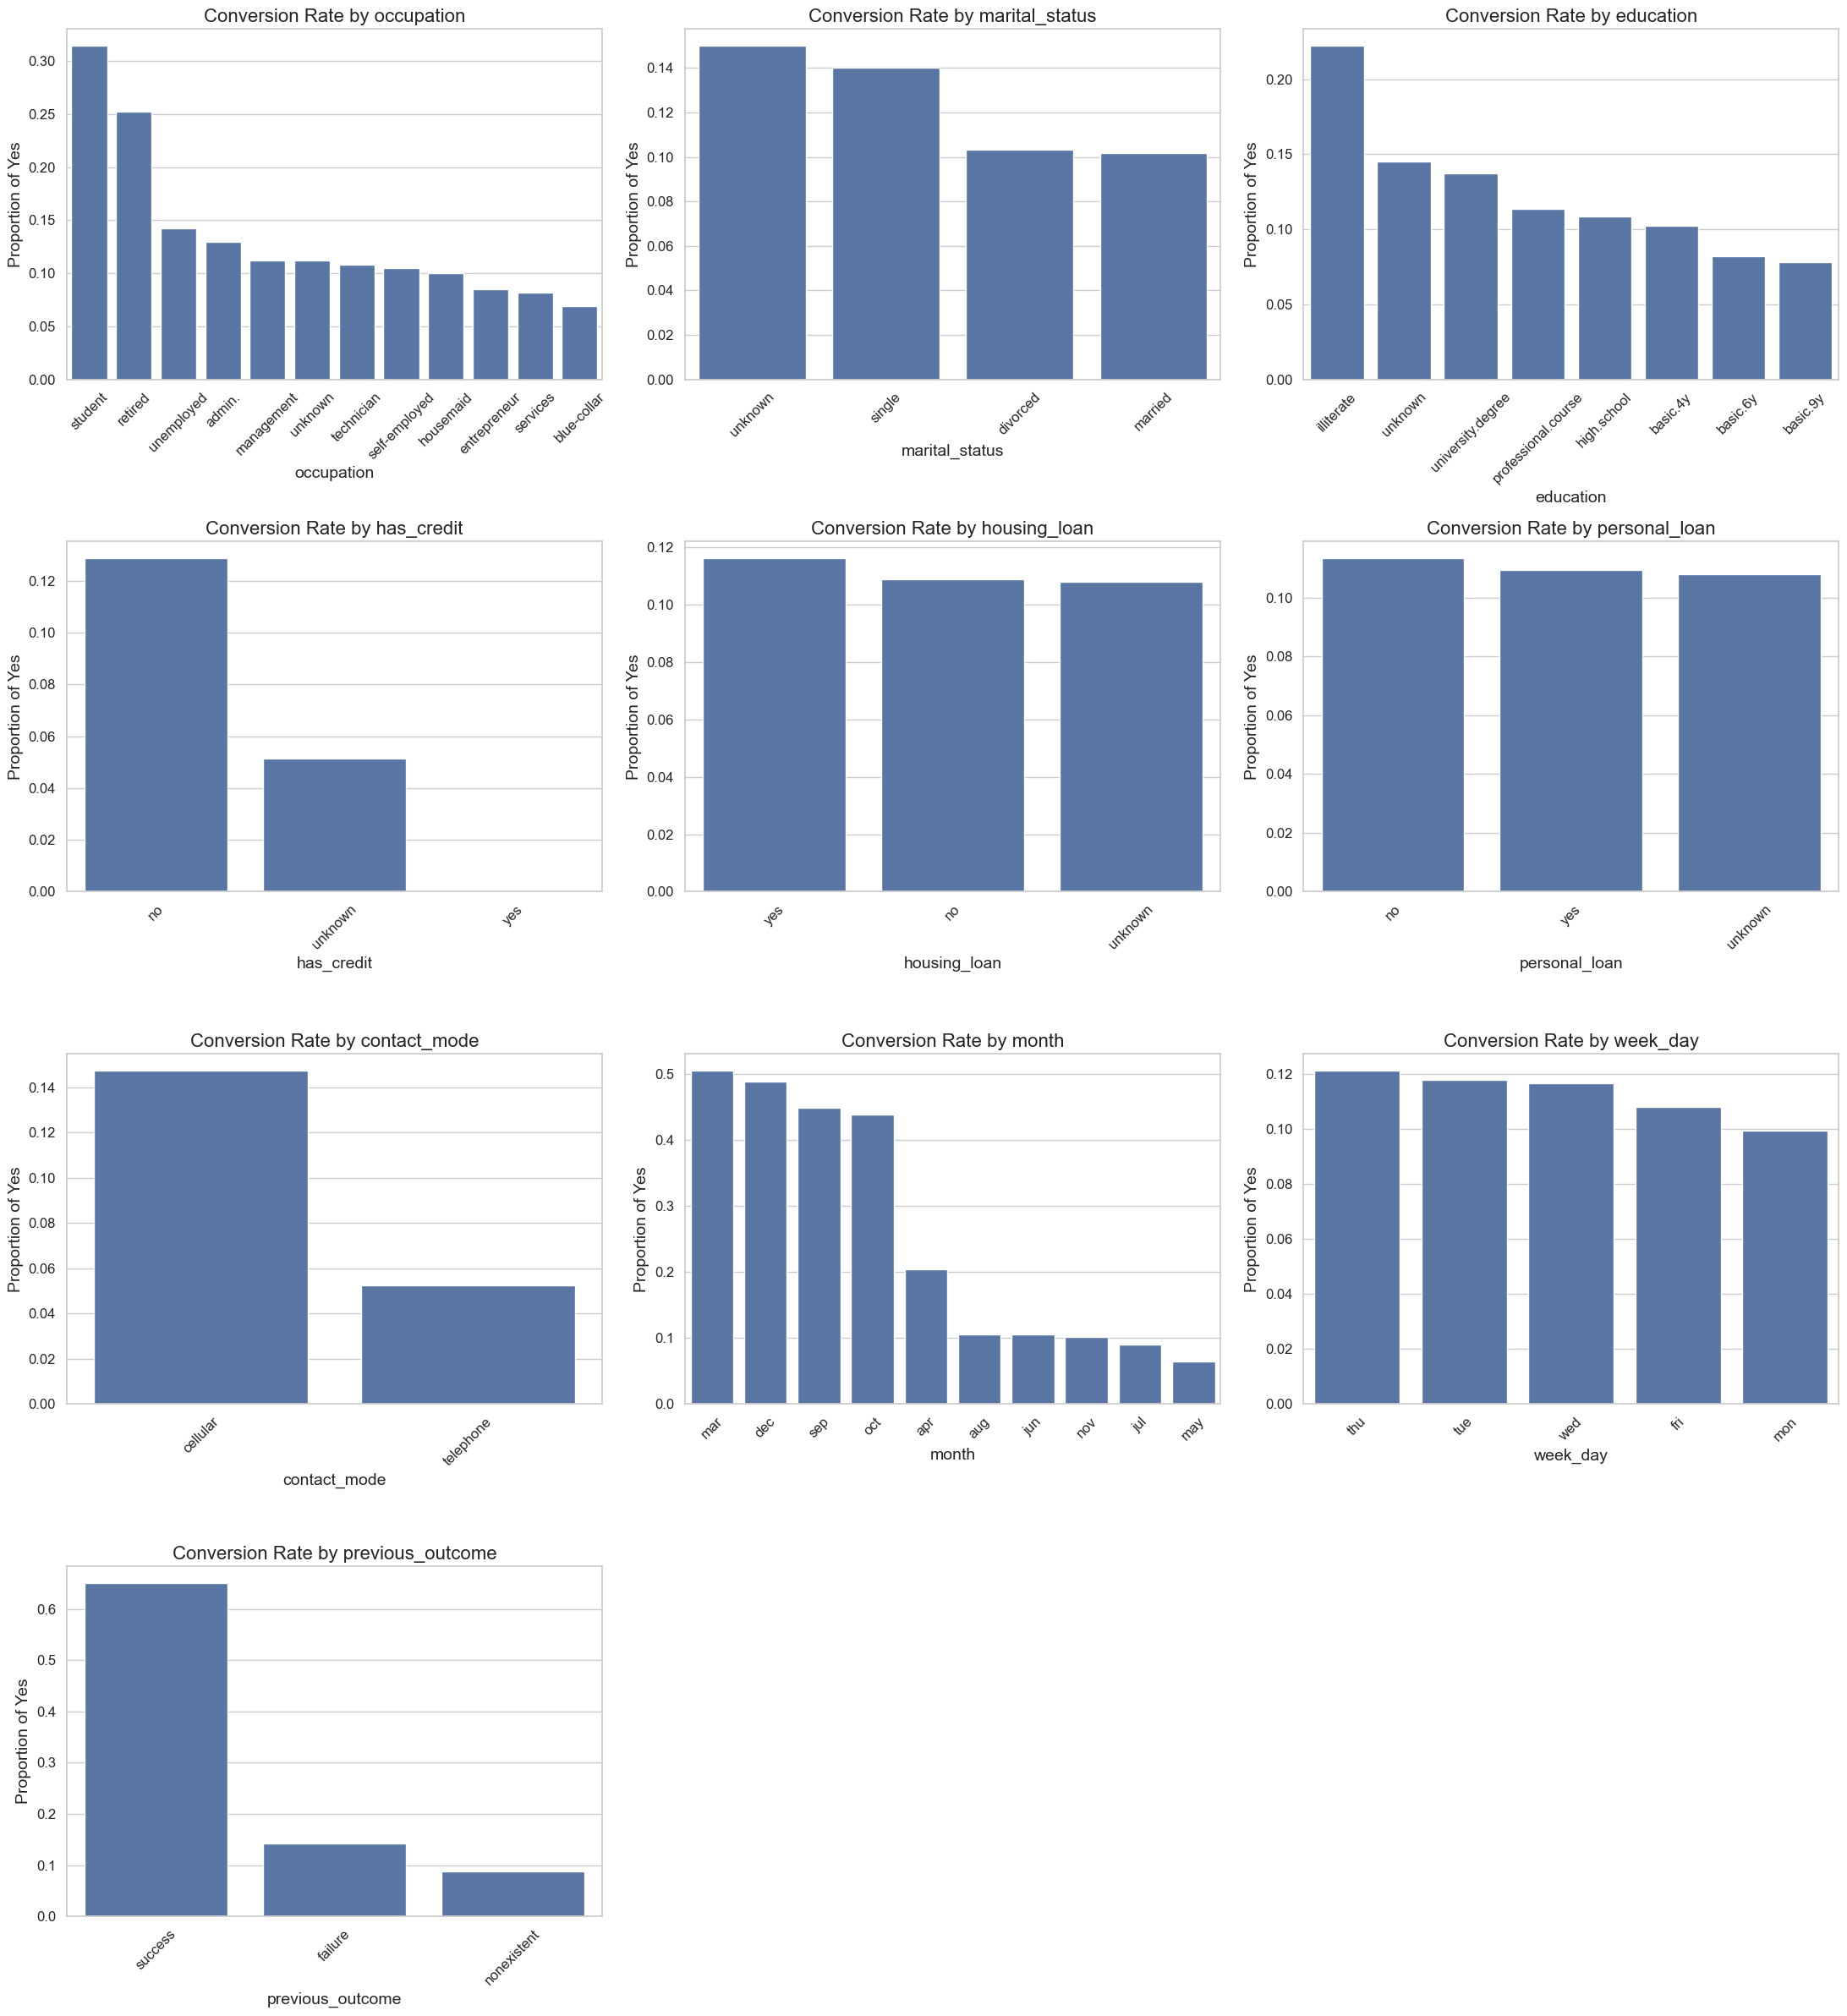

In [26]:
# Filter out 'target'
plot_cols = [col for col in cat_cols if col != 'target']

n_cols = 3
n_rows = (len(plot_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    ax = axes[i]
    
    conversion = (
        df.groupby(col)['target']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)['yes']
        .sort_values(ascending=False)
    )
    
    sns.barplot(x=conversion.index, y=conversion.values, ax=ax)
    ax.set_title(f"Conversion Rate by {col}", fontsize=16)
    ax.set_ylabel("Proportion of Yes", fontsize=14)
    ax.set_xlabel(col, fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

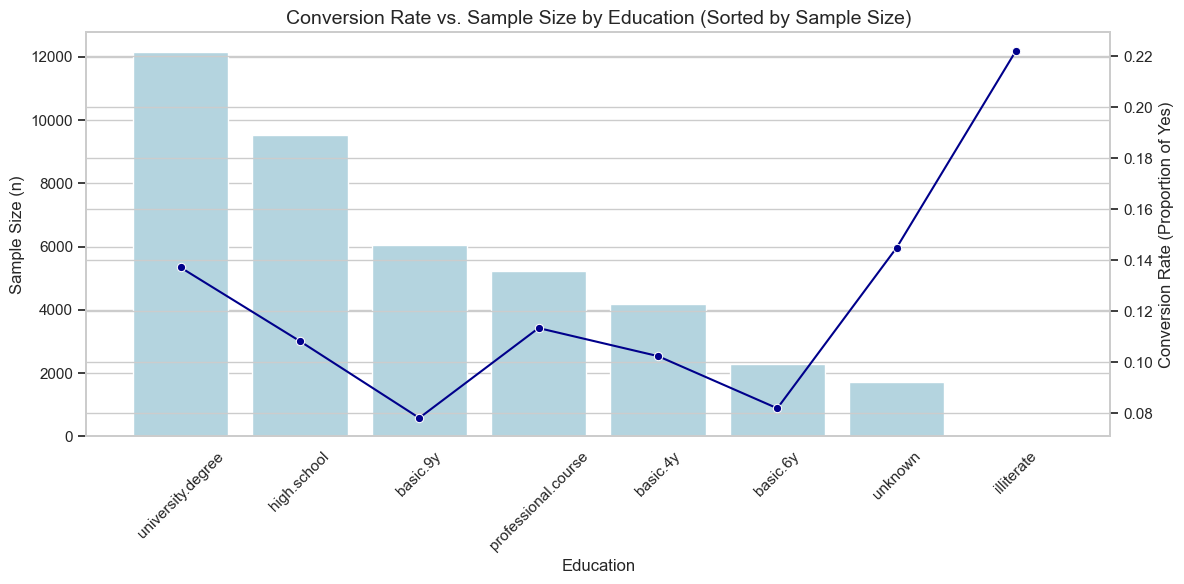

In [27]:
conversion = (
    df.groupby('education')['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
counts = df['education'].value_counts()
conversion['n'] = counts

conversion = conversion.sort_values('n', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot: sample size
sns.barplot(x=conversion.index, y=conversion['n'], ax=ax1, color='lightblue')
ax1.set_ylabel('Sample Size (n)', fontsize=12)
ax1.set_xlabel('Education', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Twin axis: conversion rate
ax2 = ax1.twinx()
sns.lineplot(x=conversion.index, y=conversion['yes'], ax=ax2, marker='o', color='darkblue')
ax2.set_ylabel('Conversion Rate (Proportion of Yes)', fontsize=12)

plt.title("Conversion Rate vs. Sample Size by Education (Sorted by Sample Size)", fontsize=14)
plt.tight_layout()
plt.show()

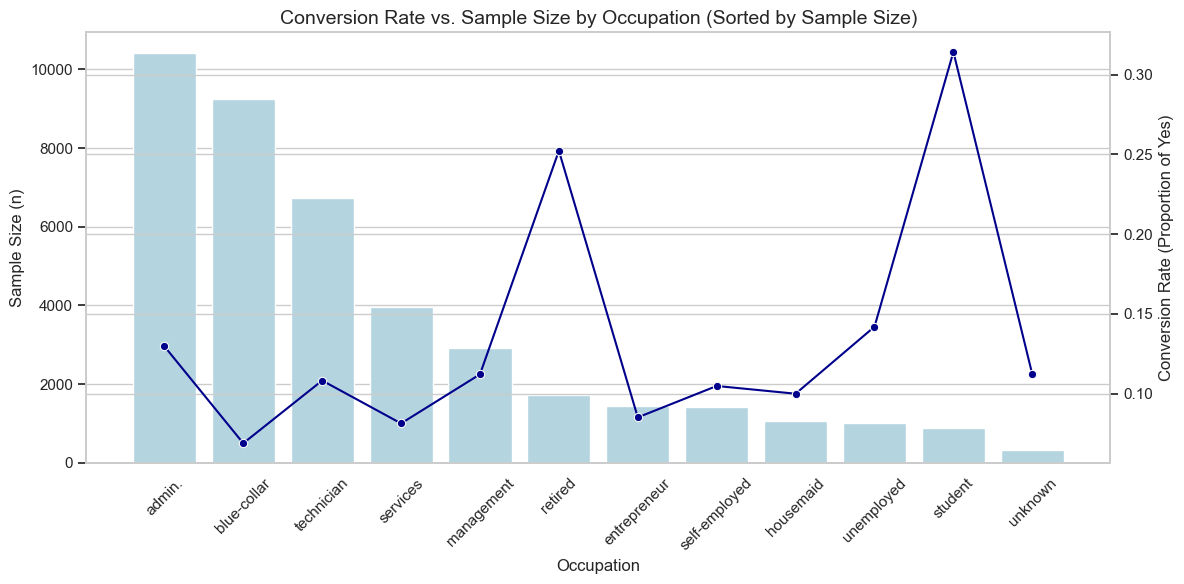

In [28]:
conversion = (
    df.groupby('occupation')['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
counts = df['occupation'].value_counts()
conversion['n'] = counts

conversion = conversion.sort_values('n', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot: sample size
sns.barplot(x=conversion.index, y=conversion['n'], ax=ax1, color='lightblue')
ax1.set_ylabel('Sample Size (n)', fontsize=12)
ax1.set_xlabel('Occupation', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Twin axis: conversion rate
ax2 = ax1.twinx()
sns.lineplot(x=conversion.index, y=conversion['yes'], ax=ax2, marker='o', color='darkblue')
ax2.set_ylabel('Conversion Rate (Proportion of Yes)', fontsize=12)

plt.title("Conversion Rate vs. Sample Size by Occupation (Sorted by Sample Size)", fontsize=14)
plt.tight_layout()
plt.show()


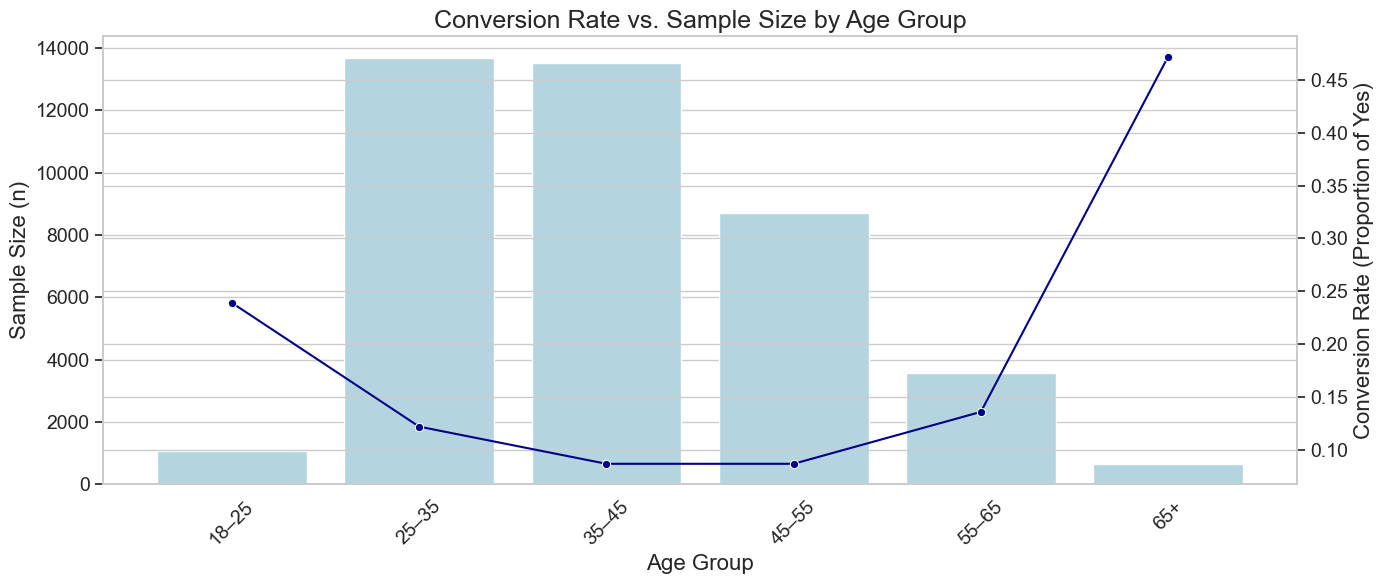

In [29]:
# Define age bins and labels
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18–25', '25–35', '35–45', '45–55', '55–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Group and calculate conversion rate + counts
conversion = (
    df.groupby('age_group')['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
counts = df['age_group'].value_counts().sort_index()
conversion['n'] = counts

conversion = conversion.loc[age_labels]

fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot: sample size
sns.barplot(x=conversion.index, y=conversion['n'], ax=ax1, color='lightblue')
ax1.set_ylabel('Sample Size (n)', fontsize=16)
ax1.set_xlabel('Age Group', fontsize=16)
ax1.tick_params(axis='y', labelsize=14)

ax1.set_xticklabels(conversion.index, fontsize=14, rotation=45)

# Line plot: conversion rate
ax2 = ax1.twinx()
sns.lineplot(x=conversion.index, y=conversion['yes'], ax=ax2, marker='o', color='darkblue')
ax2.set_ylabel('Conversion Rate (Proportion of Yes)', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)

plt.title("Conversion Rate vs. Sample Size by Age Group", fontsize=18)
plt.tight_layout()
plt.show()

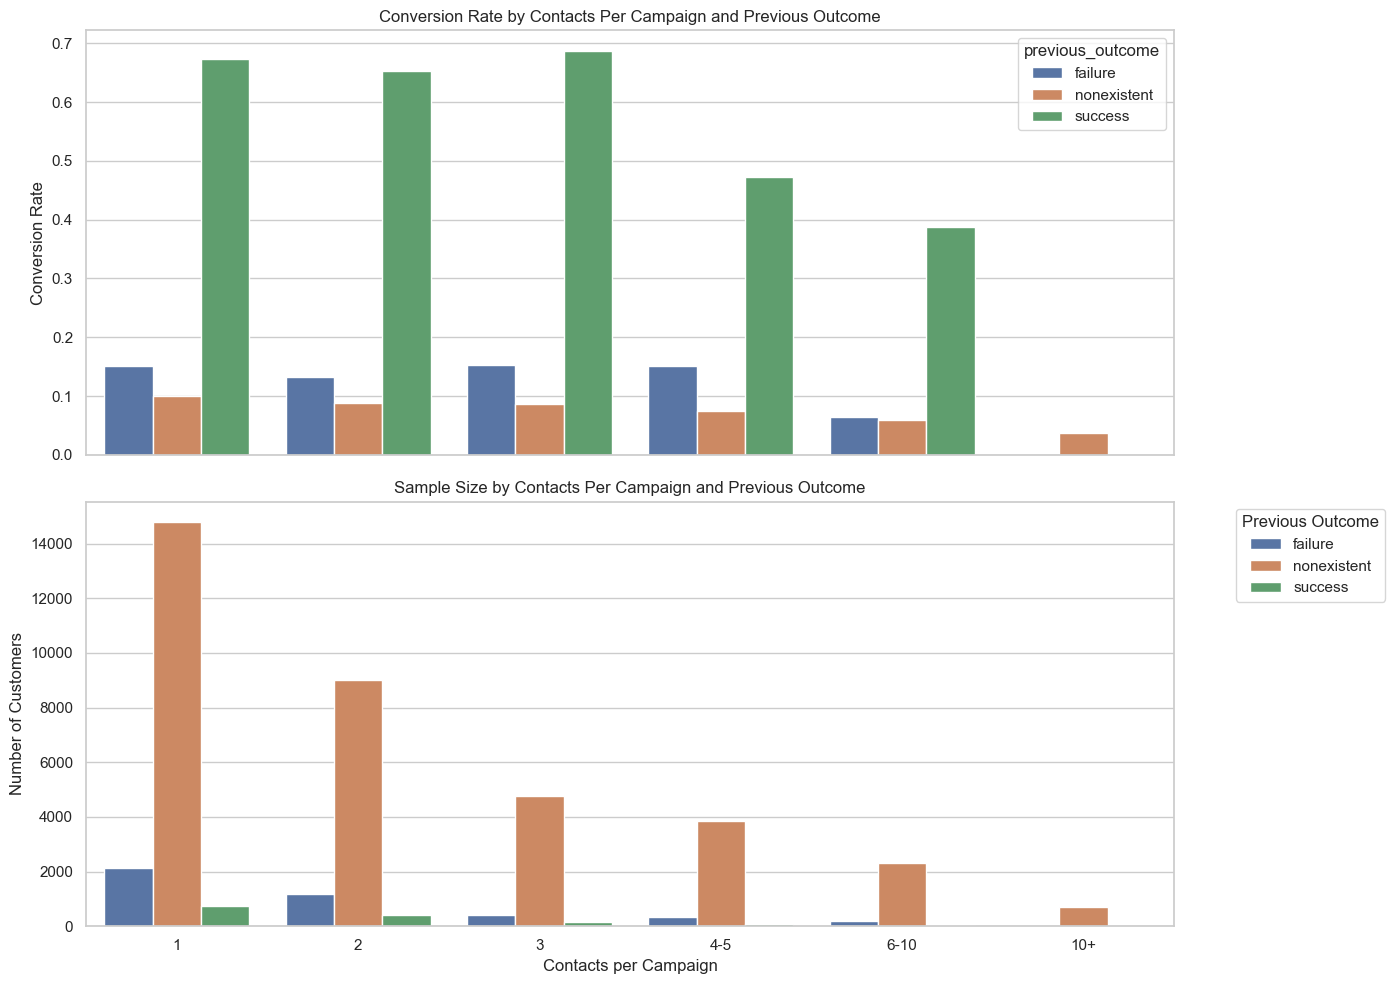

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bin contacts_per_campaign
df['contacts_bin'] = pd.cut(
    df['contacts_per_campaign'],
    bins=[0, 1, 2, 3, 5, 10, 20],
    labels=['1', '2', '3', '4-5', '6-10', '10+']
)

# Conversion rate
conversion_rate = (
    df.groupby(['contacts_bin', 'previous_outcome'])['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)
conversion_rate['conversion_rate'] = conversion_rate['yes']

# Sample size
sample_size = (
    df.groupby(['contacts_bin', 'previous_outcome'])['target']
    .count()
    .reset_index()
    .rename(columns={'target': 'count'})
)

# Merge
merged = pd.merge(conversion_rate, sample_size, on=['contacts_bin', 'previous_outcome'])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

sns.barplot(
    data=merged,
    x='contacts_bin',
    y='conversion_rate',
    hue='previous_outcome',
    ax=axes[0]
)
axes[0].set_title('Conversion Rate by Contacts Per Campaign and Previous Outcome')
axes[0].set_ylabel('Conversion Rate')

# Bottom: Sample size
sns.barplot(
    data=merged,
    x='contacts_bin',
    y='count',
    hue='previous_outcome',
    ax=axes[1]
)
axes[1].set_title('Sample Size by Contacts Per Campaign and Previous Outcome')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Contacts per Campaign')

plt.tight_layout()
plt.legend(title='Previous Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


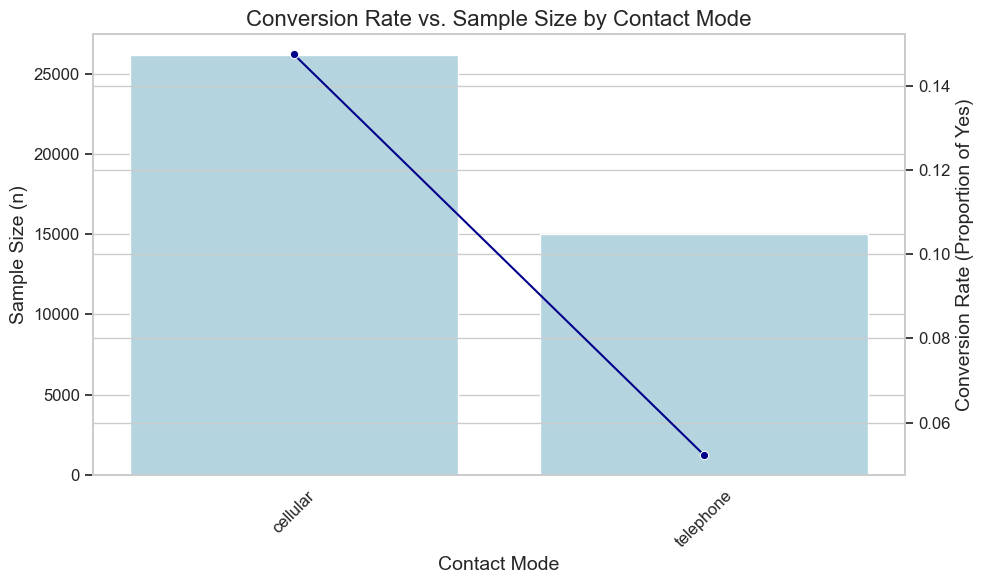

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate conversion rate and count
conversion = (
    df.groupby('contact_mode')['target']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
conversion['conversion_rate'] = conversion['yes']
conversion['n'] = df['contact_mode'].value_counts()
conversion = conversion.sort_values('n', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot: sample size
sns.barplot(x=conversion.index, y=conversion['n'], ax=ax1, color='lightblue')
ax1.set_ylabel('Sample Size (n)', fontsize=14)
ax1.set_xlabel('Contact Mode', fontsize=14)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xticklabels(conversion.index, fontsize=12, rotation=45)

# Line plot: conversion rate
ax2 = ax1.twinx()
sns.lineplot(x=conversion.index, y=conversion['conversion_rate'], ax=ax2, marker='o', color='darkblue')
ax2.set_ylabel('Conversion Rate (Proportion of Yes)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

plt.title('Conversion Rate vs. Sample Size by Contact Mode', fontsize=16)
plt.tight_layout()
plt.show()
